# Bert Embedding

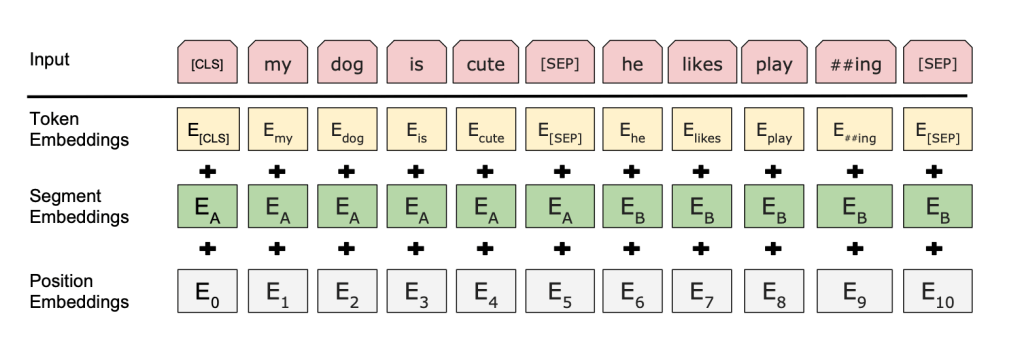

In [14]:
from IPython.display import Image
Image(filename='./images/02-01.png') 

Embedding 实际上是一种查找表
- 查表
  - token embedding: 30522 * 768
  - segment embedding: 2 * 768
  - position embedding: 512 * 768
- 后处理
  - LayerNorm
  - Dropout

In [15]:
from transformers import BertTokenizer, BertModel
import torch 
from torch import nn

model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)
test_sent = 'this is a test sentence'

In [16]:
input = tokenizer(test_sent, return_tensors='pt')
input

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231, 6251,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [17]:
input_ids = input['input_ids']
token_type_ids = input['token_type_ids']

In [18]:
input_ids.shape

torch.Size([1, 7])

In [19]:
pos_ids = torch.arange(input_ids.shape[1])

In [20]:
pos_ids

tensor([0, 1, 2, 3, 4, 5, 6])

## Token Embedding

In [21]:
token_embed = model.embeddings.word_embeddings(input_ids)
token_embed.shape

torch.Size([1, 7, 768])

## Segment Type Embedding

In [22]:
seg_embed = model.embeddings.token_type_embeddings(token_type_ids)
seg_embed.shape

torch.Size([1, 7, 768])

In [23]:
seg_embed

tensor([[[ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
         [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
         [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
         ...,
         [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
         [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086],
         [ 0.0004,  0.0110,  0.0037,  ..., -0.0066, -0.0034, -0.0086]]],
       grad_fn=<EmbeddingBackward0>)

## Position Embedding

In [24]:
pos_embed = model.embeddings.position_embeddings(pos_ids)
pos_embed.shape

torch.Size([7, 768])

In [25]:
pos_embed

tensor([[ 1.7505e-02, -2.5631e-02, -3.6642e-02,  ...,  3.3437e-05,
          6.8312e-04,  1.5441e-02],
        [ 7.7580e-03,  2.2613e-03, -1.9444e-02,  ...,  2.8910e-02,
          2.9753e-02, -5.3247e-03],
        [-1.1287e-02, -1.9644e-03, -1.1573e-02,  ...,  1.4908e-02,
          1.8741e-02, -7.3140e-03],
        ...,
        [-5.6087e-03, -1.0445e-02, -7.2288e-03,  ...,  2.0837e-02,
          3.5402e-03,  4.7708e-03],
        [-3.0871e-03, -1.8956e-02, -1.8930e-02,  ...,  7.4045e-03,
          2.0183e-02,  3.4077e-03],
        [ 6.4257e-03, -1.7664e-02, -2.2067e-02,  ...,  6.7531e-04,
          1.1108e-02,  3.7521e-03]], grad_fn=<EmbeddingBackward0>)

## Input Embedding

In [26]:
input_embed = token_embed + seg_embed + pos_embed.unsqueeze(0)
input_embed

tensor([[[ 0.0316, -0.0411, -0.0564,  ...,  0.0021,  0.0044,  0.0219],
         [-0.0489,  0.0285, -0.0204,  ...,  0.0190,  0.0265, -0.0045],
         [-0.0469, -0.0156, -0.0336,  ...,  0.0117,  0.0135,  0.0109],
         ...,
         [ 0.0185, -0.0608, -0.0331,  ...,  0.0040, -0.0071, -0.1213],
         [ 0.0294, -0.0017, -0.0217,  ..., -0.0004, -0.0913, -0.0948],
         [-0.0077, -0.0166, -0.0123,  ..., -0.0310,  0.0124, -0.0064]]],
       grad_fn=<AddBackward0>)

## Post-Processing

In [27]:
embed = model.embeddings.LayerNorm(input_embed)
embed = model.embeddings.dropout(embed)
embed

tensor([[[ 0.1686, -0.2858, -0.3261,  ..., -0.0276,  0.0383,  0.1640],
         [-0.6485,  0.6739, -0.0932,  ...,  0.4475,  0.6696,  0.1820],
         [-0.6270, -0.0633, -0.3143,  ...,  0.3427,  0.4636,  0.4594],
         ...,
         [ 0.6010, -0.6970, -0.2001,  ...,  0.2960,  0.2060, -1.7181],
         [ 0.8323,  0.2878,  0.0021,  ...,  0.2628, -1.1310, -1.2708],
         [-0.1481, -0.2948, -0.1690,  ..., -0.5009,  0.2544, -0.0700]]],
       grad_fn=<NativeLayerNormBackward0>)

In [28]:
embed.shape

torch.Size([1, 7, 768])